# Defining custom Image Dataset loader and usage
![](https://drive.google.com/uc?id=19OgB7mwWLE_fGBOMG-QQ5ryVqQk3DpQT)

In [39]:
import torch
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [40]:
image_dir = '/home/sysad/Documents/Bhoomika/Python/Image Classification using Custon NN/images/train'
for label, class_dir in enumerate(os.listdir(image_dir)):
  print(label, class_dir)

0 Dog
1 person
2 Cat


In [41]:
class ImageDataset(Dataset):
  def __init__(self, image_dir, transform=None):
    self.image_dir = image_dir
    self.image_paths = []
    self.labels = []
    self.class_name = {}
    self.transform = transform

    for label, class_dir in enumerate(os.listdir(image_dir)):
      self.class_name[label] = class_dir
      class_path = os.path.join(image_dir, class_dir)
      for img_name in os.listdir(class_path):
        self.image_paths.append(os.path.join(class_path, img_name))
        self.labels.append(label)

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, idx):
    img_path = self.image_paths[idx]
    image = Image.open(img_path).convert("RGB")
    label = self.labels[idx]

    if self.transform:
      image = self.transform(image)

    return image, label

In [42]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()]
)

In [43]:
train_image_dir = '/home/sysad/Documents/Bhoomika/Python/Image Classification using Custon NN/images/train'
test_image_dir = '/home/sysad/Documents/Bhoomika/Python/Image Classification using Custon NN/images/test'

train_image_dataset = ImageDataset(image_dir=train_image_dir, transform=transform)
test_image_dataset = ImageDataset(image_dir=test_image_dir, transform=transform)

In [44]:
train_image_loader = DataLoader(dataset=train_image_dataset, batch_size=32, shuffle=True)
test_image_loader = DataLoader(dataset=test_image_dataset, batch_size=32, shuffle=True)

In [45]:
for images,labels in train_image_loader:
  print(images.shape, labels.shape)

torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([3

In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
print(train_image_dataset.class_name)
print(test_image_dataset.class_name)

{0: 'Dog', 1: 'person', 2: 'Cat'}
{0: 'Dog', 1: 'person', 2: 'Cat'}


torch.Size([32, 3, 128, 128]) torch.Size([32])
(3, 128, 128)
person
(128, 128, 3)
1


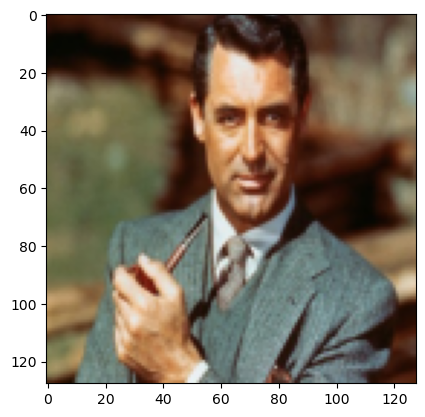

In [59]:
for images, labels in train_image_loader:
  print(images.shape, labels.shape)
  img = images[0].numpy()
  print(img.shape)
  label = labels[0].item()
  print(train_image_dataset.class_name[label])
  img = np.transpose(img, (1,2,0))
  print(img.shape)
  print(label)
  plt.imshow(img, vmin=0, vmax=255)
  break

# Custom CNN Architecture

In [60]:
import torch.nn as nn
import torch.optim as optim

In [61]:
class CustomCnnModel(nn.Module):
  def __init__(self,input_dim, num_classes):
    super(CustomCnnModel, self).__init__()
    self.input_dim = input_dim
    self.num_classes = num_classes

    self.conv_layers = nn.Sequential(
        # C1
        nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
        # 128x128x3 --> 3x3x3x32 --> wxhx32
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        # C2
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        # C3
        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        # C4
        nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self._to_linear = None
    self._get_conv_output(self.input_dim)

    self.fc_layers = nn.Sequential(
        nn.Linear(self._to_linear, 512),
        nn.ReLU(),
        # nn.Dropout(0.2)
        nn.Linear(512, 128),
        nn.ReLU(),
        nn.Linear(128, self.num_classes),
    )

    # 256 x 12 x 12

  def _get_conv_output(self, input_dim=128):
    with torch.no_grad():
      dummy_input = torch.zeros(1,3, input_dim, input_dim)
      output = self.conv_layers(dummy_input)
      self._to_linear = output.view(1, -1).size(1)

  def forward(self,x):
    x = self.conv_layers(x)
    x = x.view(x.size(0), -1)
    x = self.fc_layers(x)
    return x

In [62]:
# Initialize Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CustomCnnModel(input_dim=128, num_classes=3).to(device)

In [63]:
print(model)

CustomCnnModel(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_sta

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [65]:
len(train_image_loader)

95

In [ ]:
# Training loop
epochs = 5
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_image_loader:
    images,labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    # [x, 3, 128, 128]

    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  print(f"Epoch {epoch+1}/{epochs}, Loss : {running_loss/len(train_image_loader)}")


In [33]:
torch.save(model.state_dict(), "cnn_model.pth")

In [34]:
for images, labels in test_image_loader:
  print(labels.shape)
  break

torch.Size([32])


In [35]:
# Evaluate model

model.eval()
correct = 0
total = 0

with torch.no_grad():
  for images, labels in test_image_loader:
    images,labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f"Test accuracy is :{100* correct / total:.2f}%")


Test accuracy is :80.50%


In [36]:
import cv2

In [37]:
class ImageClassifier:
  def __init__(self, model_path, class_names):
    self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    self.model = CustomCnnModel(input_dim=128, num_classes=3).to(self.device)
    self.model.load_state_dict(torch.load(model_path, map_location=self.device))
    self.model.eval()
    self.class_names = class_names
    self.transform = transforms.Compose([
      transforms.Resize((128,128)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]
    )

  def predict(self, image_path):
    image = Image.open(image_path).convert("RGB")
    input_tensor = self.transform(image).unsqueeze(0).to(self.device)
    with torch.no_grad():
      output = self.model(input_tensor)
      _, predicted = torch.max(output, 1)
    label = self.class_names[predicted.item()]

    img = cv2.imread(image_path)
    cv2.putText(img, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.imwrite("output_image.jpg",img)
    return label



In [38]:
classfier = ImageClassifier("/home/sysad/Documents/Bhoomika/Python/Image Classification using Custon NN/cnn_model.pth", train_image_dataset.class_name )
label = classfier.predict("/home/sysad/Documents/Bhoomika/Python/Image Classification using Custon NN/shih-tzu-long2.jpg")
print(f"Predicted class is : {label}")

Predicted class is : person
